<a href="https://colab.research.google.com/github/rana6-12/Graduation-Project/blob/main/Graduation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

 Load Dataset

In [8]:
 df = pd.read_csv("/content/All_13100_Entries_with_Nutrient_Ranges.csv")
print("✅ Dataset Loaded Successfully!")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
df.head()

✅ Dataset Loaded Successfully!
Rows: 13100, Columns: 13


,N,P,K,temperature,humidity,pH,rainfall,label,Plant_Category,EC (mS/cm) Range,Ca (ppm) Range,Mg (ppm) Range,Na (ppm) Range (Max)
0,58,34,42,18.1006,60.5567,7.5063,33.1599,Origanum majorana,Herb_Spice,1.5-2.5 mS/cm,100-150 ppm,30-50 ppm,< 50 ppm
1,56,40,57,23.7085,71.4758,7.6218,27.2026,Coriandrum sativum,Unclassified,1.5-2.5 mS/cm,100-180 ppm,30-50 ppm,< 60 ppm
2,136,37,81,18.2818,68.8113,7.3104,19.4648,Cucurbita pepo,Fruiting_Veg,2.0-4.5 mS/cm,180-250 ppm,40-70 ppm,< 50 ppm (Sensitive)
3,90,28,48,27.7032,66.6544,7.3479,48.6461,Mentha piperita,Herb_Spice,1.5-2.5 mS/cm,100-150 ppm,30-50 ppm,< 50 ppm
4,39,40,53,18.7403,53.3352,7.5331,36.7384,Raphanus sativus,Root_Tuber,1.8-2.8 mS/cm,100-180 ppm,30-60 ppm,< 70 ppm


 Missing Values Analysis

In [9]:
missing = df.isnull().sum()

print("📍 Missing Values per Column:\n")
print(missing)

📍 Missing Values per Column:

N                       0
P                       0
K                       0
temperature             0
humidity                0
pH                      0
rainfall                0
label                   0
Plant_Category          0
EC (mS/cm) Range        0
Ca (ppm) Range          0
Mg (ppm) Range          0
Na (ppm) Range (Max)    0
dtype: int64


 Visualization

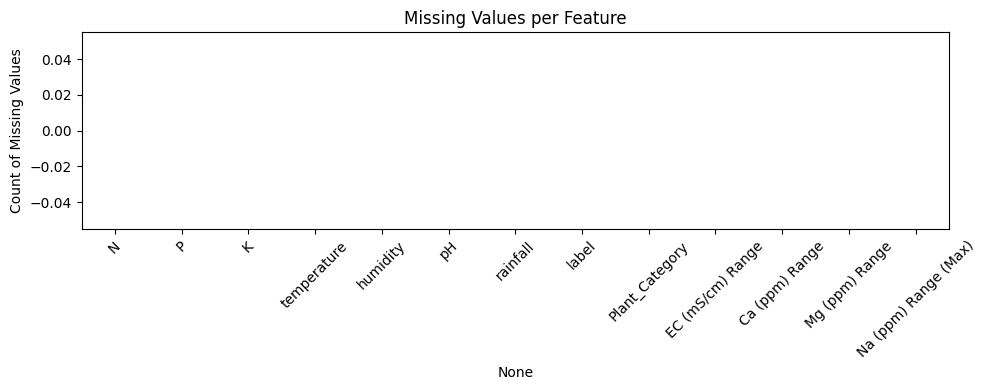

In [10]:
plt.figure(figsize=(10,4))
sns.barplot(x=missing.index, y=missing.values)
plt.title("Missing Values per Feature")
plt.xticks(rotation=45)
plt.ylabel("Count of Missing Values")
plt.tight_layout()
plt.show()

Outliers - Before Cleaning

In [14]:
# لو الداتا موجودة في df
numeric_cols = ['N','P','K','temperature','humidity','pH','rainfall']

def check_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # نحسب عدد القيم الشاذة
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    print(f"🔍 Column: {column} → Outliers found: {len(outliers)}")

# تشغيلها على كل الأعمدة الرقمية
for col in numeric_cols:
    check_outliers(df, col)

🔍 Column: N → Outliers found: 5
🔍 Column: P → Outliers found: 10
🔍 Column: K → Outliers found: 88
🔍 Column: temperature → Outliers found: 53
🔍 Column: humidity → Outliers found: 339
🔍 Column: pH → Outliers found: 111
🔍 Column: rainfall → Outliers found: 345


Visualization

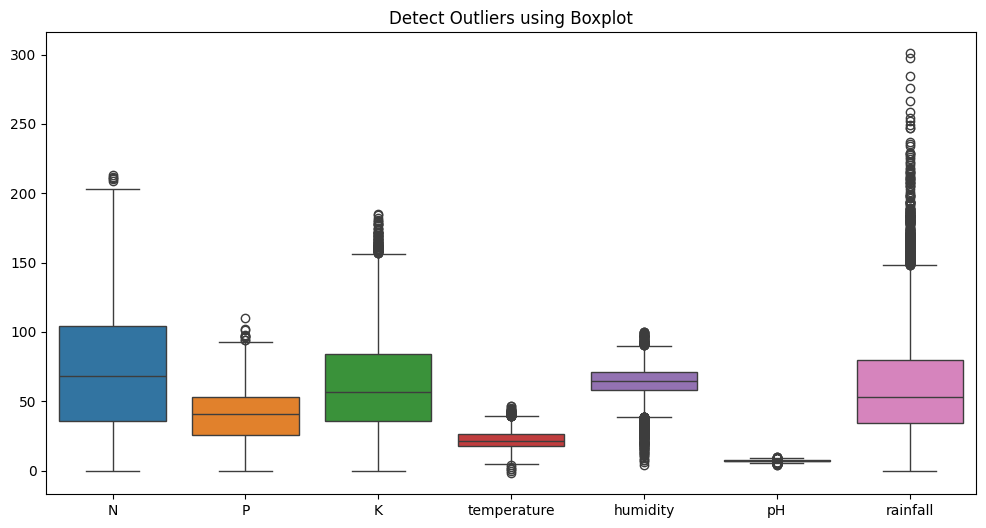

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_cols])
plt.title("Detect Outliers using Boxplot")
plt.show()

Remove/Treat Outliers - IQR Method

In [17]:
def handle_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Replace values outside range with boundaries (Not Delete - to avoid data loss)
    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))

# Apply for each numerical feature
for col in numeric_cols:
    handle_outliers(col)

print("✅ Outliers have been treated using IQR method.")


✅ Outliers have been treated using IQR method.


Outliers Visualization (After Cleaning)

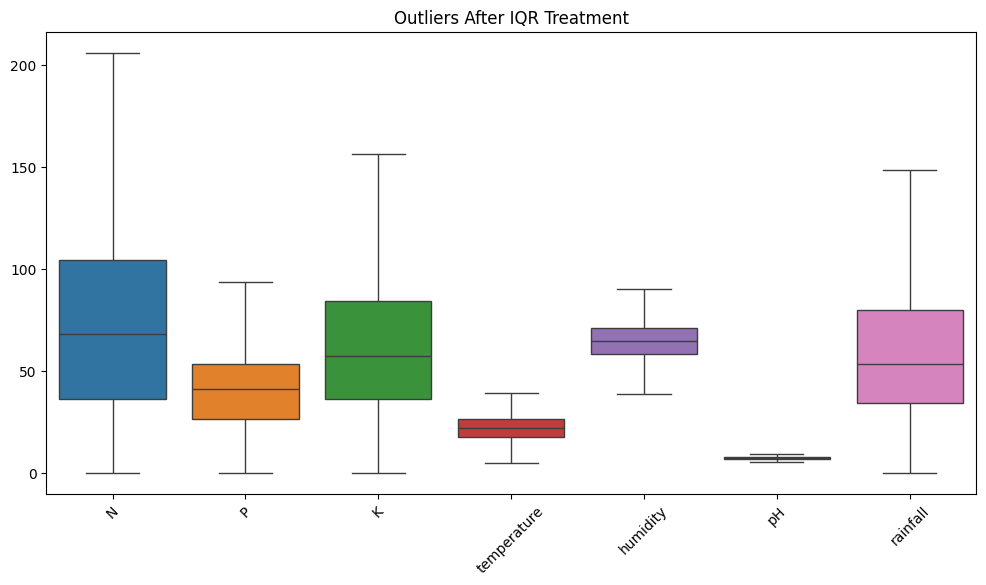

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_cols])
plt.title("Outliers After IQR Treatment")
plt.xticks(rotation=45)
plt.show()

 Histogram & Density Plot (After Cleaning)


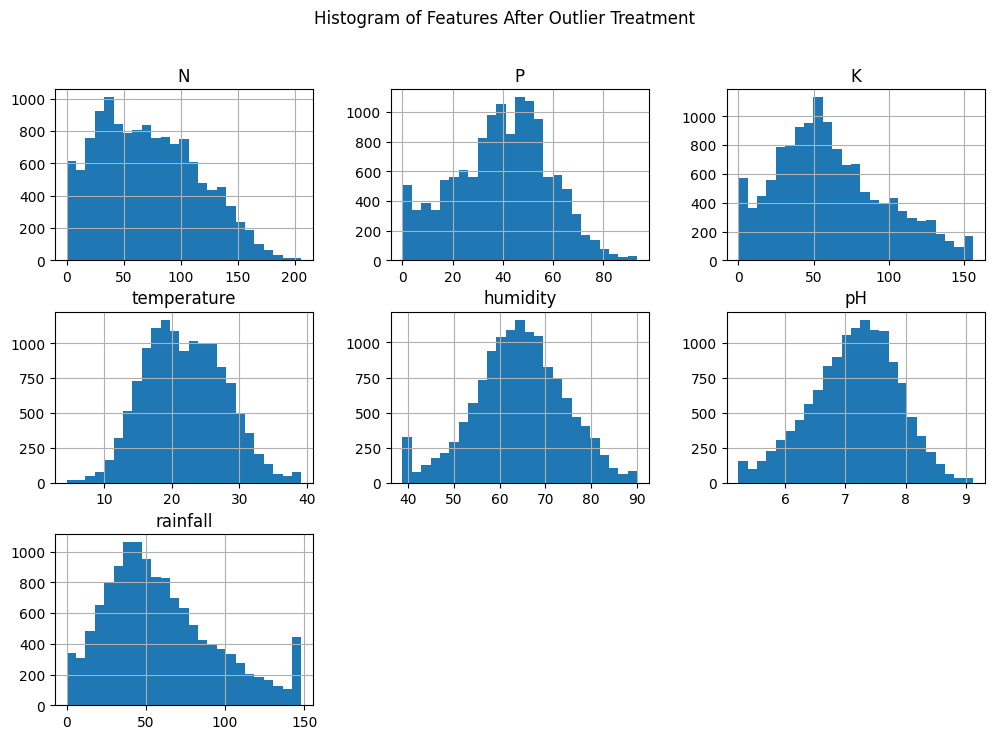

In [19]:
df[numeric_cols].hist(figsize=(12,8), bins=25)
plt.suptitle("Histogram of Features After Outlier Treatment")
plt.show()

Correlation Heatmap (Important for Analysis)

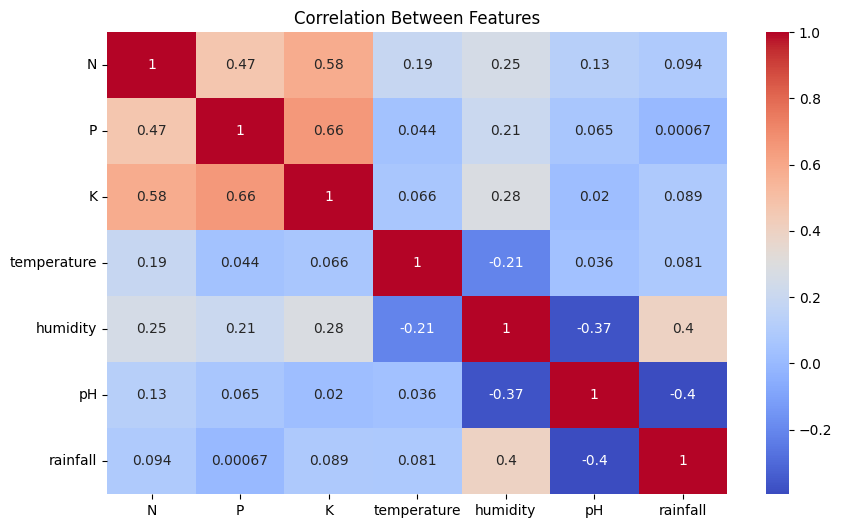

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()

Feature Scaling (Normalization – MinMaxScaler)

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("✅ Features scaled using Min-Max Normalization.")

✅ Features scaled using Min-Max Normalization.


Label Encoding (Crop Names to Numbers)

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

print("✅ Crop Labels have been encoded to numeric values.")

✅ Crop Labels have been encoded to numeric values.


Feature Engineering (Adding Smart New Features)

In [23]:
df['N_to_P_ratio'] = df['N'] / (df['P'] + 1e-5)
df['NPK_Total'] = df['N'] + df['P'] + df['K']
df['Water_Stress'] = df['rainfall'] / (df['temperature'] + 1e-5)

print("✅ New features have been added successfully!")

✅ New features have been added successfully!


Save Preprocessed Data

In [24]:
df.to_csv("Preprocessed_Crop_Data.csv", index=False)
print("✅ Cleaned Dataset Saved as: Preprocessed_Crop_Data.csv")

✅ Cleaned Dataset Saved as: Preprocessed_Crop_Data.csv
